In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
X = data['data']
y = data['target']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [21]:
from sklearn.linear_model import Lasso
lasso = Lasso()
param_grid = {'alpha': np.logspace(-4, 4, 50)}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha (lambda) value: {best_alpha}")

Best alpha (lambda) value: 0.004291934260128779


In [22]:
lasso_best = Lasso(alpha=best_alpha)
lasso_best.fit(X_train, y_train)

y_pred = lasso_best.predict(X_test)
y_pred

array([2.84269953, 1.28423918, 1.45189561, ..., 1.5564655 , 1.42819151,
       2.60079995])

In [23]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on the test set: {mse}")

Mean Squared Error on the test set: 0.5386229650497505


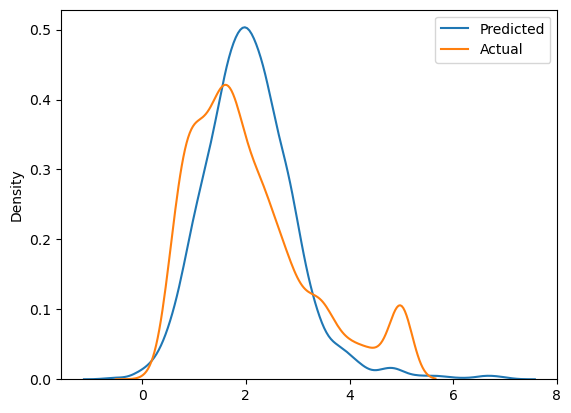

In [24]:
sns.kdeplot(y_pred, label="Predicted")
sns.kdeplot(y_test, label="Actual")
plt.legend()
plt.show()

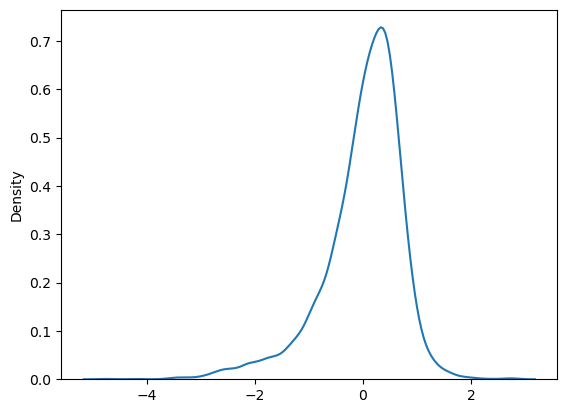

In [25]:
sns.kdeplot(y_pred-y_test)
plt.show()